## Observations and Insights 

In [136]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset

# Display the data table for preview


In [137]:
mouse_metadata.head()

Mouse ID Drug Regimen     Sex  Age_months  Weight (g)
0     k403     Ramicane    Male          21          16
1     s185    Capomulin  Female           3          17
2     x401    Capomulin  Female          16          15
3     m601    Capomulin    Male          22          17
4     g791     Ramicane    Male          11          16

In [138]:
study_results.head()

Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites
0     b128          0                45.0                 0
1     f932          0                45.0                 0
2     g107          0                45.0                 0
3     a457          0                45.0                 0
4     c819          0                45.0                 0

In [139]:
df= pd.merge(mouse_metadata,study_results,how='outer',on='Mouse ID')
df.head()

Mouse ID Drug Regimen   Sex  Age_months  Weight (g)  Timepoint  \
0     k403     Ramicane  Male          21          16          0   
1     k403     Ramicane  Male          21          16          5   
2     k403     Ramicane  Male          21          16         10   
3     k403     Ramicane  Male          21          16         15   
4     k403     Ramicane  Male          21          16         20   

   Tumor Volume (mm3)  Metastatic Sites  
0           45.000000                 0  
1           38.825898                 0  
2           35.014271                 1  
3           34.223992                 1  
4           32.997729                 1

In [140]:
# Checking the number of mice.

In [141]:
df.count()

Mouse ID              1893
Drug Regimen          1893
Sex                   1893
Age_months            1893
Weight (g)            1893
Timepoint             1893
Tumor Volume (mm3)    1893
Metastatic Sites      1893
dtype: int64

In [142]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 


In [143]:
dup_mouse_list = df.loc[df.duplicated(subset=['Mouse ID', 'Timepoint']),'Mouse ID'].unique()
print(dup_mouse_list)#+test

['g989']


In [144]:
# Optional: Get all the data for the duplicate mouse ID. 

In [145]:
df[df.loc[:,'Mouse ID']=='g989']

Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
908     g989     Propriva  Female          21          26          0   
909     g989     Propriva  Female          21          26          0   
910     g989     Propriva  Female          21          26          5   
911     g989     Propriva  Female          21          26          5   
912     g989     Propriva  Female          21          26         10   
913     g989     Propriva  Female          21          26         10   
914     g989     Propriva  Female          21          26         15   
915     g989     Propriva  Female          21          26         15   
916     g989     Propriva  Female          21          26         20   
917     g989     Propriva  Female          21          26         20   
918     g989     Propriva  Female          21          26         25   
919     g989     Propriva  Female          21          26         30   
920     g989     Propriva  Female          21          26         35   

     Tumor Volume (mm3)  Metastatic Sites  
908           45.000000                 0  
909           45.000000                 0  
910           48.786801                 0  
911           47.570392                 0  
912           51.745156                 0  
913           49.880528                 0  
914           51.325852                 1  
915           53.442020                 0  
916           55.326122                 1  
917           54.657650                 1  
918           56.045564                 1  
919           59.082294                 1  
920           62.570880                 2

In [146]:
dup_mouse=df[df.loc[:,'Mouse ID']=='g989']
dup_mouse['Mouse ID'].count()


13

In [147]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
# Checking the number of mice in the clean DataFrame.

In [148]:
clean_df = df[df['Mouse ID'].isin(dup_mouse_list)==False]
clean_df.count()

Mouse ID              1880
Drug Regimen          1880
Sex                   1880
Age_months            1880
Weight (g)            1880
Timepoint             1880
Tumor Volume (mm3)    1880
Metastatic Sites      1880
dtype: int64

In [149]:
#displays the remaining mouse id in the data frame
clean_df[clean_df.loc[:,'Mouse ID']=='g989']
# print(clean_df)

Empty DataFrame
Columns: [Mouse ID, Drug Regimen, Sex, Age_months, Weight (g), Timepoint, Tumor Volume (mm3), Metastatic Sites]
Index: []

## Summary Statistics

In [150]:
#
clean_df['Tumor Volume (mm3)'].describe()

count    1880.000000
mean       50.435293
std         8.914197
min        22.050126
25%        45.000000
50%        48.933454
75%        56.324075
max        78.567014
Name: Tumor Volume (mm3), dtype: float64

In [151]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

In [152]:
stats_mean=clean_df.groupby('Drug Regimen').mean()['Tumor Volume (mm3)']
stats_median=clean_df.groupby('Drug Regimen').median()['Tumor Volume (mm3)']
stats_var=clean_df.groupby('Drug Regimen').var()['Tumor Volume (mm3)']
stats_std=clean_df.groupby('Drug Regimen').std()['Tumor Volume (mm3)']
stats_sem=clean_df.groupby('Drug Regimen').sem()['Tumor Volume (mm3)']
stats_df=pd.DataFrame({
    'Mean':stats_mean,
    'Median':stats_median,
    'Variance':stats_var,
    'Standard Deviation':stats_std,
    'SEM':stats_sem
})

stats_df

Mean     Median   Variance  Standard Deviation       SEM
Drug Regimen                                                               
Capomulin     40.675741  41.557809  24.947764            4.994774  0.329346
Ceftamin      52.591172  51.776157  39.290177            6.268188  0.469821
Infubinol     52.884795  51.820584  43.128684            6.567243  0.492236
Ketapril      55.235638  53.698743  68.553577            8.279709  0.603860
Naftisol      54.331565  52.509285  66.173479            8.134708  0.596466
Placebo       54.033581  52.288934  61.168083            7.821003  0.581331
Propriva      52.320930  50.446266  43.852013            6.622085  0.544332
Ramicane      40.216745  40.673236  23.486704            4.846308  0.320955
Stelasyn      54.233149  52.431737  59.450562            7.710419  0.573111
Zoniferol     53.236507  51.818479  48.533355            6.966589  0.516398

In [153]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line

In [154]:
agg_stats=clean_df[['Drug Regimen','Tumor Volume (mm3)']]
agg_stats.head()#+test
agg_df=agg_stats.groupby('Drug Regimen').agg({'Tumor Volume (mm3)':['mean', 'median', 'var', 'std', 'sem']})
agg_df

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

In [155]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.

In [156]:
#for referance
list(clean_df['Drug Regimen'].unique())

['Ramicane',
 'Capomulin',
 'Infubinol',
 'Placebo',
 'Ceftamin',
 'Stelasyn',
 'Zoniferol',
 'Ketapril',
 'Propriva',
 'Naftisol']

Text(0.5, 1.0, 'Drug Trial Sample Sizes')

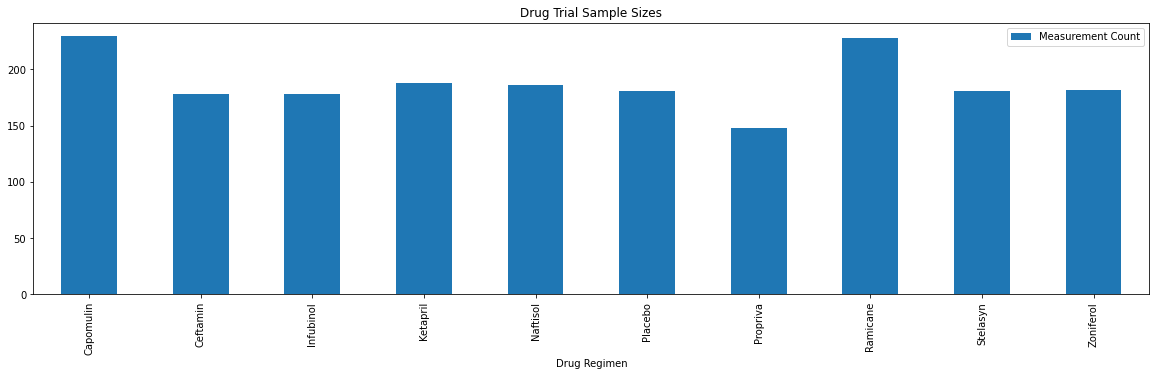

In [157]:
bar_cnt=clean_df.groupby('Drug Regimen').count()['Mouse ID']
bar_cnt
# drug_list=clean_df['Drug Regimen'].unique()
panda_bar_df=pd.DataFrame({
    'Measurement Count':bar_cnt})
panda_bar_df.plot(kind='bar', figsize=(20,5))
plt.title('Drug Trial Sample Sizes')

In [158]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.

Text(0, 0.5, 'Measurements')

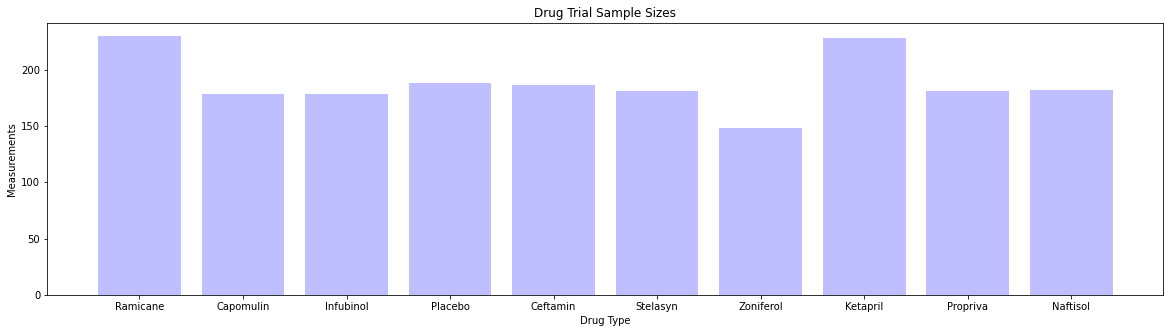

In [159]:
bar_cnt=clean_df.groupby('Drug Regimen').count()['Mouse ID']
bar_cnt
drug_list=clean_df['Drug Regimen'].unique()
plt.figure(figsize=(20,5))
plt.bar(drug_list, bar_cnt, color='b', alpha=0.25, align="center")
plt.title("Drug Trial Sample Sizes")
plt.xlabel("Drug Type")
plt.ylabel("Measurements")


In [160]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

In [161]:
sex_df=df['Sex']
sex_cnt_df=sex_df.value_counts()
sex_cnt_df

Male      958
Female    935
Name: Sex, dtype: int64

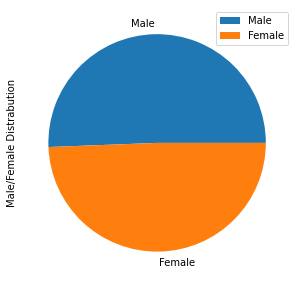

In [162]:
sex_df_unique=df['Sex'].unique().tolist()
sex_cnt=sex_df.value_counts(sort=True).tolist()

pie_df = pd.DataFrame({'Sex of Mice': sex_df_unique,'Male/Female Distrabution': sex_cnt},index=['Male','Female'])
pie_df.plot.pie(y='Male/Female Distrabution',figsize=(5,5))


In [163]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

Text(0.5, 1.0, 'Male/Female Distrabution')

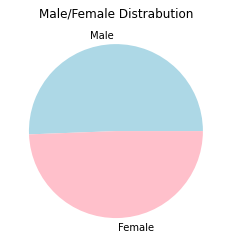

In [164]:
sex_df_unique=df['Sex'].unique().tolist()
sex_cnt=sex_df.value_counts(sort=True).tolist()
colors=["lightblue","pink"]
plt.pie(sex_cnt, labels=sex_df_unique, colors=colors)
plt.title('Male/Female Distrabution')

## Quartiles, Outliers and Boxplots

In [165]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint

In [166]:
great_df=clean_df.groupby('Mouse ID')['Timepoint'].max()
max_time_df=pd.merge(great_df,clean_df,on=['Mouse ID','Timepoint'])
max_time_df

Mouse ID  Timepoint Drug Regimen     Sex  Age_months  Weight (g)  \
0       a203         45    Infubinol  Female          20          23   
1       a251         45    Infubinol  Female          21          25   
2       a262         45      Placebo  Female          17          29   
3       a275         45     Ceftamin  Female          20          28   
4       a366         30     Stelasyn  Female          16          29   
..       ...        ...          ...     ...         ...         ...   
243     z435         10     Propriva  Female          12          26   
244     z578         45     Ramicane    Male          11          16   
245     z581         45    Infubinol  Female          24          25   
246     z795         45     Naftisol  Female          13          29   
247     z969         45     Naftisol    Male           9          30   

     Tumor Volume (mm3)  Metastatic Sites  
0             67.973419                 2  
1             65.525743                 1  
2             70.717621                 4  
3             62.999356                 3  
4             63.440686                 1  
..                  ...               ...  
243           48.710661                 0  
244           30.638696                 0  
245           62.754451                 3  
246           65.741070                 3  
247           73.867845                 4  

[248 rows x 8 columns]

In [167]:
four_drug_list=['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
clean_maxtime_df=max_time_df[max_time_df['Drug Regimen'].isin(four_drug_list)]
clean_maxtime_df

Mouse ID  Timepoint Drug Regimen     Sex  Age_months  Weight (g)  \
0       a203         45    Infubinol  Female          20          23   
1       a251         45    Infubinol  Female          21          25   
3       a275         45     Ceftamin  Female          20          28   
6       a411         45     Ramicane    Male           3          22   
7       a444         45     Ramicane  Female          10          25   
..       ...        ...          ...     ...         ...         ...   
238     y769         45     Ceftamin  Female           6          27   
239     y793         45    Capomulin    Male          17          17   
240     y865         45     Ceftamin    Male          23          26   
244     z578         45     Ramicane    Male          11          16   
245     z581         45    Infubinol  Female          24          25   

     Tumor Volume (mm3)  Metastatic Sites  
0             67.973419                 2  
1             65.525743                 1  
3             62.999356                 3  
6             38.407618                 1  
7             43.047543                 0  
..                  ...               ...  
238           68.594745                 4  
239           31.896238                 2  
240           64.729837                 3  
244           30.638696                 0  
245           62.754451                 3  

[100 rows x 8 columns]

In [168]:
drug_mice=clean_maxtime_df.groupby(['Drug Regimen','Mouse ID'])['Tumor Volume (mm3)']
drug_mice.sum()#sum is only used to print a result as there is only one record in the sum equation

Drug Regimen  Mouse ID
Capomulin     b128        38.982878
              b742        38.939633
              f966        30.485985
              g288        37.074024
              g316        40.159220
                            ...    
Ramicane      s508        30.276232
              u196        40.667713
              w678        43.166373
              y449        44.183451
              z578        30.638696
Name: Tumor Volume (mm3), Length: 100, dtype: float64

In [169]:
#turn the above into a dateframe
drug_mice=clean_maxtime_df.groupby(['Drug Regimen','Mouse ID'])
drug_mice['Tumor Volume (mm3)'].sum().to_frame()

Tumor Volume (mm3)
Drug Regimen Mouse ID                    
Capomulin    b128               38.982878
             b742               38.939633
             f966               30.485985
             g288               37.074024
             g316               40.159220
...                                   ...
Ramicane     s508               30.276232
             u196               40.667713
             w678               43.166373
             y449               44.183451
             z578               30.638696

[100 rows x 1 columns]

In [170]:
#reprint for referance
clean_maxtime_df.head()

Mouse ID  Timepoint Drug Regimen     Sex  Age_months  Weight (g)  \
0     a203         45    Infubinol  Female          20          23   
1     a251         45    Infubinol  Female          21          25   
3     a275         45     Ceftamin  Female          20          28   
6     a411         45     Ramicane    Male           3          22   
7     a444         45     Ramicane  Female          10          25   

   Tumor Volume (mm3)  Metastatic Sites  
0           67.973419                 2  
1           65.525743                 1  
3           62.999356                 3  
6           38.407618                 1  
7           43.047543                 0

In [171]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds

In [172]:
four_drug_list=['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
list_tumor_vol = []
for drug_type in four_drug_list:

    drug_tumor_vol = clean_maxtime_df.loc[clean_maxtime_df["Drug Regimen"] == drug_type,'Tumor Volume (mm3)']
    list_tumor_vol.append(drug_tumor_vol)
    
    quartiles = drug_tumor_vol.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
#     print(f"The lower quartile of {drug_type} is: {lowerq}")
#     print(f"The upper quartile of {drug_type} is: {upperq}")
#     print(f"The interquartile range of {drug_type} is: {iqr}")
#     print(f"The the median of {drug_type} is: {quartiles[0.5]} ")

    outliers = drug_tumor_vol.loc[(drug_tumor_vol < lower_bound) | (drug_tumor_vol > upper_bound)]
    print(f"{drug_type}'s potential outliers: {outliers}")
#     print(f"If {drug_type}'s values is below {lower_bound} it may be an outlier.")
#     print(f"If {drug_type}'s values is above {upper_bound} it may be an outlier.")


Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


In [173]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

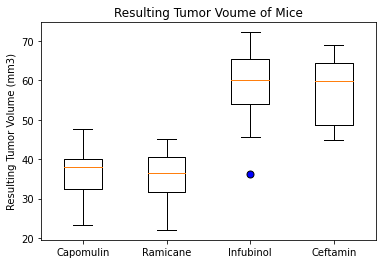

In [174]:
outliers = dict(markerfacecolor='blue',markersize=7)


plt.boxplot(list_tumor_vol, labels = four_drug_list,flierprops=outliers)
#longhand
# plt.boxplot([capomulin,ramicane,infubinol,ceftamin],labels=['Capomulin','Ramicane','Infubinol','Ceftamin'],flierprops=outliers)
plt.ylabel('Resulting Tumor Volume (mm3)')
plt.title('Resulting Tumor Voume of Mice')
plt.show()

## Line and Scatter Plots

In [175]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

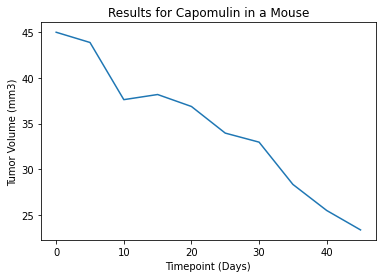

In [176]:
line_plot_df=clean_df.filter(items=['Mouse ID','Drug Regimen','Timepoint','Tumor Volume (mm3)'])
line_plot_df#+test
cap_value= line_plot_df['Drug Regimen']=='Capomulin'
cap_value#+test bool values
cap_df = line_plot_df[cap_value]
cap_df#+test
mouse=cap_df['Mouse ID']=='s185'
cap_mouse_df=cap_df[mouse]
cap_mouse_df#+test

x_axis=cap_mouse_df['Timepoint']
y_axis=cap_mouse_df['Tumor Volume (mm3)']
plt.xlabel("Timepoint (Days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title('Results for Capomulin in a Mouse')

plt.plot(x_axis,y_axis)
plt.show()

In [177]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


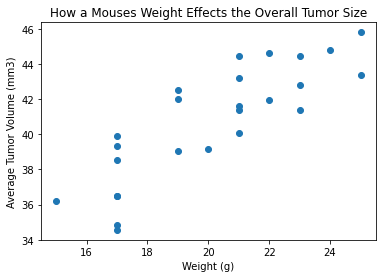

In [178]:
line_plot_df=clean_df.filter(items=['Mouse ID','Drug Regimen','Weight (g)','Tumor Volume (mm3)'])
line_plot_df#+test
cap_value1= line_plot_df.loc[line_plot_df['Drug Regimen']=='Capomulin']
cap_value1#+test rerturns a dataframe remove first line_plot_df.loc and a boolean value is returned
mice_means=cap_value1.groupby(['Mouse ID']).mean()
# mice_means

plt.scatter(mice_means['Weight (g)'],mice_means['Tumor Volume (mm3)'])
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('How a Mouses Weight Effects the Overall Tumor Size')
plt.show()

## Correlation and Regression

In [179]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

In [180]:
#reprint for referance
mice_means.head(5)

Weight (g)  Tumor Volume (mm3)
Mouse ID                                
b128              22           41.963636
b742              21           40.083699
f966              17           36.505973
g288              19           41.990097
g316              22           44.613344

The correlation between avg. weight and tumor size is 0.84


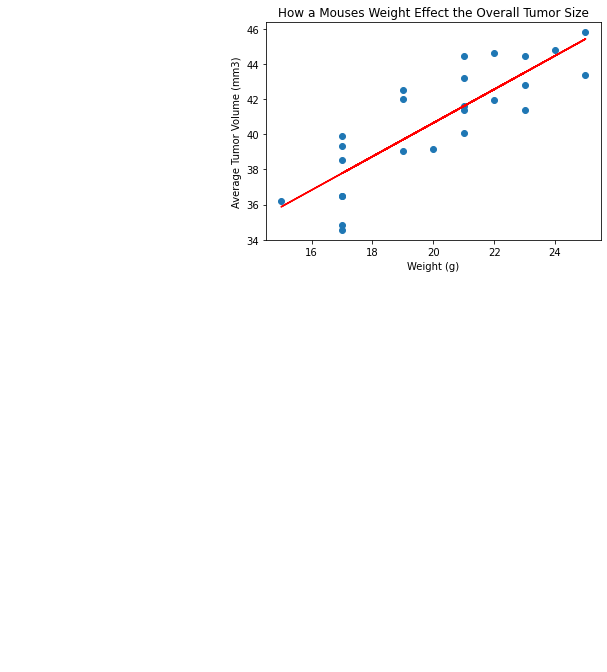

In [181]:
mouse_wt = mice_means['Weight (g)']
vol_tum = mice_means['Tumor Volume (mm3)']
correlation = st.pearsonr(mouse_wt,vol_tum)
print(f"The correlation between avg. weight and tumor size is {round(correlation[0],2)}")

x_axis=mice_means['Weight (g)']
y_axis=mice_means['Tumor Volume (mm3)']
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_axis,y_axis)
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('How a Mouses Weight Effect the Overall Tumor Size')
plt.show()